# Most informative lines figures

In [15]:
import os
import sys
import itertools as itt
from typing import List, Dict, Union, Tuple

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.insert(0, os.path.join("..", ".."))
sys.path.insert(1, os.path.join(".."))

from infovar import DiscreteHandler
from infovar.stats.ranking import prob_higher

from infobs.plots import Plotter
from pdr_util import latex_line, latex_param, Settings

Settings.only_rotational = True

plt.rc("text", usetex=True)

## Configuration of Handler

In [16]:
handler = DiscreteHandler()

handler.set_paths(
    save_path=os.path.join("..", "data", "discrete", "results"),
)

## Configuration of Plotter

In [17]:
plotter = Plotter(
    line_formatter=latex_line,
    param_formatter=latex_param,
)

latex_comb_lines = lambda ls: plotter.lines_comb_formatter(ls, short=False)
latex_comb_params = lambda ps: plotter.params_comb_formatter(ps)

In [18]:
def param_str(params: Union[str, List[str]]):
    if isinstance(params, str):
        return params
    return "_".join(params)

def regime_str(params: Union[str, Tuple[str, str]], reg: Dict[str, str]):
    if isinstance(params, str):
        return param_str(params) + "_" + reg[params]
    return "_".join([param_str(param) + "_" + reg[param] for param in params])

## Settings

In [19]:
env_name = "pdr1"
params = "Avmax"
n_lines = [1, 2, 3]
zoom_in = False

In [20]:
fir_lines = [
    "c_el3p_j1__el3p_j0",
    "c_el3p_j2__el3p_j1",
    "cp_el2p_j3_2__el2p_j1_2"
]

emir_lines = [
    "hcn_j1_f2__j0_f1",
    "hcop_j1__j0",
    "hnc_j1__j0",
    "cs_j2__j1",
    "c_18o_j1__j0",
    "13c_o_j1__j0",
    "cn_n1_j0d5__n0_j0d5",
    "cn_n1_j1d5__n0_j0d5",
    "co_v0_j1__v0_j0",
    "cs_j3__j2",
    "c2h_n2d0_j2d5_f3d0__n1d0_j1d5_f2d0",
    "hcn_j2_f3__j1_f2",
    "hcop_j2__j1",
    "c_18o_j2__j1",
    "13c_o_j2__j1",
    "cn_n2_j1d5__n1_j0d5",
    "cn_n2_j2d5__n1_j1d5",
    "co_v0_j2__v0_j1",
    "cs_j5__j4",
    "c2h_n3d0_j3d5_f4d0__n2d0_j2d5_f3d0",
    "c2h_n3d0_j2d5_f3d0__n2d0_j1d5_f2d0",
    "hcn_j3_f3__j2_f3",
    "hcop_j3__j2",
    "hnc_j3__j2",
    "cs_j6__j5",
    "c_18o_j3__j2",
    "13c_o_j3__j2",
    "cn_n3_j2d5__n2_j1d5",
    "cn_n3_j3d5__n2_j2d5",
    "cs_j7__j6",
    "co_v0_j3__v0_j2",
    "c2h_n4d0_j4d5_f5d0__n3d0_j3d5_f4d0",
    "c2h_n4d0_j3d5_f4d0__n3d0_j2d5_f3d0",
    "hcn_j4_f4__j3_f3",
    "hcop_j4__j3"
]

In [21]:
if not os.path.exists(env_name):
    os.mkdir(env_name)

## Plot regime results

In [22]:
iterable = itt.chain(
    *[itt.combinations(emir_lines, k) for k in n_lines],
    *[itt.combinations(fir_lines, k) for k in n_lines]
)
iterable = list(iterable)

items = handler.read(
    iterable,
    params,
    env_name,
    default=None,
    iterable_x=True
)

100%|██████████| 7182/7182 [00:07<00:00, 1009.73it/s] 


In [23]:
for n, v in zip(iterable, items):
    if v is None:
        print(n)

In [24]:
mis = np.array([it["mi"]["value"] for it in items if it is not None])
mi_sigmas = np.array([it["mi"]["std"] for it in items if it is not None])
lininfos = np.array([it["linearinfo"]["value"] for it in items if it is not None])
lininfo_sigmas = np.array([it["linearinfo"]["std"] for it in items if it is not None])

order_mi = np.argsort(mis)[::-1]
order_lininfo = np.argsort(lininfos)[::-1]

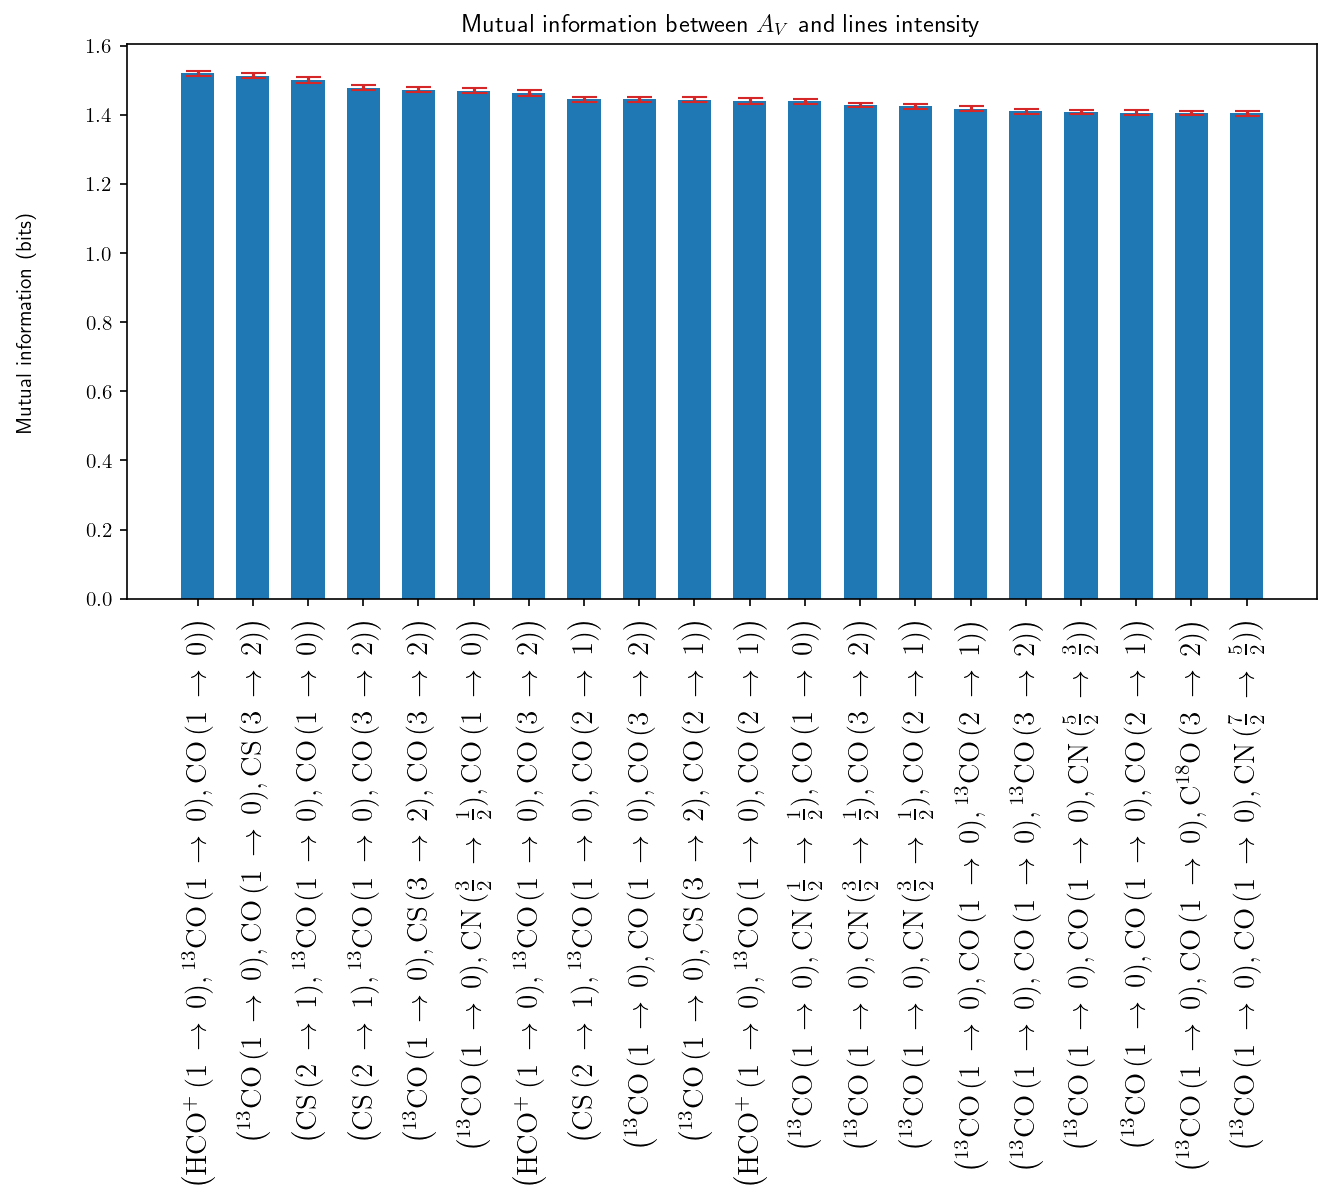

In [25]:
first = 20

plt.figure(figsize=(0.08*first * 6.4, 4.8), dpi=150)
_ = plotter.plot_mi_bar(
    [iterable[i] for i in order_mi[:first]], mis[order_mi[:first]],
    sorted=False, errs=mi_sigmas[order_mi[:first]], short_names=False
)
plt.title(f"Mutual information between ${latex_comb_params(params)}$ and lines intensity")
plt.savefig(os.path.join(env_name, f"{param_str(params)}_mi_{'_'.join([str(n) for n in n_lines])}"), bbox_inches="tight")

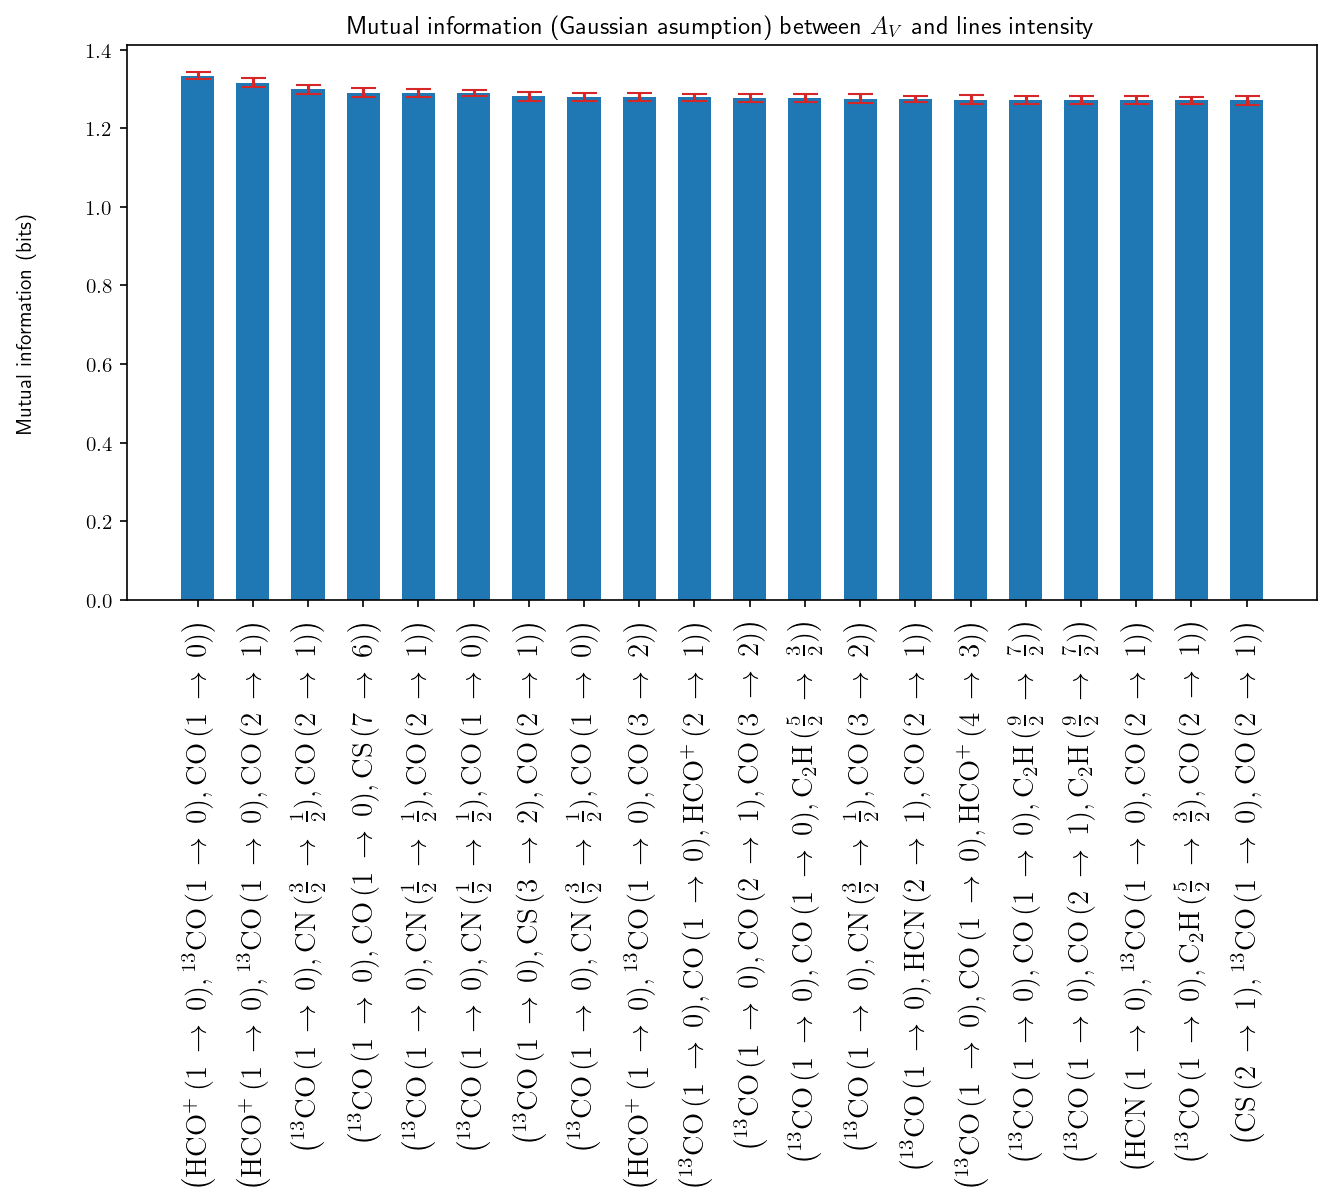

In [26]:
plt.figure(figsize=(0.08*first * 6.4, 4.8), dpi=150)
_ = plotter.plot_mi_bar(
    [iterable[i] for i in order_lininfo[:first]], lininfos[order_lininfo[:first]],
    sorted=False, errs=lininfo_sigmas[order_lininfo[:first]], short_names=False
)
plt.title(f"Mutual information (Gaussian asumption) between ${latex_comb_params(params)}$ and lines intensity")
plt.savefig(os.path.join(env_name, f"{param_str(params)}_gauss_{'_'.join([str(n) for n in n_lines])}"), bbox_inches="tight")

In [27]:
probs = prob_higher(mis[order_mi[:10]], mi_sigmas[order_mi[:10]])

print("Kraskov estimate of MI:")
for n, p in zip([iterable[i] for i in order_mi[:10]], probs):
    print(n, f"{100*p:.4f}%")

Kraskov estimate of MI:
('hcop_j1__j0', '13c_o_j1__j0', 'co_v0_j1__v0_j0') 74.5639%
('13c_o_j1__j0', 'co_v0_j1__v0_j0', 'cs_j3__j2') 23.3242%
('cs_j2__j1', '13c_o_j1__j0', 'co_v0_j1__v0_j0') 2.1117%
('cs_j2__j1', '13c_o_j1__j0', 'co_v0_j3__v0_j2') 0.0000%
('13c_o_j1__j0', 'cs_j3__j2', 'co_v0_j3__v0_j2') 0.0000%
('13c_o_j1__j0', 'cn_n1_j1d5__n0_j0d5', 'co_v0_j1__v0_j0') 0.0000%
('hcop_j1__j0', '13c_o_j1__j0', 'co_v0_j3__v0_j2') 0.0000%
('cs_j2__j1', '13c_o_j1__j0', 'co_v0_j2__v0_j1') 0.0000%
('13c_o_j1__j0', 'co_v0_j1__v0_j0', 'co_v0_j3__v0_j2') 0.0000%
('13c_o_j1__j0', 'cs_j3__j2', 'co_v0_j2__v0_j1') 0.0000%


In [28]:
probs = prob_higher(lininfos[order_lininfo[:10]], lininfo_sigmas[order_lininfo[:10]])

print("Canonical correlation estimate of MI:")
for n, p in zip([iterable[i] for i in order_lininfo[:10]], probs):
    print(n, f"{100*p:.4f}%")

Canonical correlation estimate of MI:
('hcop_j1__j0', '13c_o_j1__j0', 'co_v0_j1__v0_j0') 88.1965%
('hcop_j1__j0', '13c_o_j1__j0', 'co_v0_j2__v0_j1') 10.8922%
('13c_o_j1__j0', 'cn_n1_j1d5__n0_j0d5', 'co_v0_j2__v0_j1') 0.0000%
('13c_o_j1__j0', 'co_v0_j1__v0_j0', 'cs_j7__j6') 0.0000%
('13c_o_j1__j0', 'cn_n1_j0d5__n0_j0d5', 'co_v0_j2__v0_j1') 0.0000%
('13c_o_j1__j0', 'cn_n1_j0d5__n0_j0d5', 'co_v0_j1__v0_j0') 0.0000%
('13c_o_j1__j0', 'cs_j3__j2', 'co_v0_j2__v0_j1') 0.0000%
('13c_o_j1__j0', 'cn_n1_j1d5__n0_j0d5', 'co_v0_j1__v0_j0') 0.0000%
('hcop_j1__j0', '13c_o_j1__j0', 'co_v0_j3__v0_j2') 0.0000%
('13c_o_j1__j0', 'co_v0_j1__v0_j0', 'hcop_j2__j1') 0.0000%
